**Nome:** Thiago de Assis Costa 

**RGM**: 40842827

**Instituição:** Cruzeiro do Sul Virtual

**Curso:** Ciência de dados

**Link do dataset utilizado:** https://www.kaggle.com/datasets/thiagomustasheep/amazon-fine-foods-reviews

**Link do meu video de apresentação:** https://www.loom.com/share/136e9d56d91542419346481eb32af314?sid=67a92035-76ad-4f02-91ca-2b214c75f867

# Introdução

Para o desenvolvimento deste projeto, utilizou-se o dataset "Amazon-fine-foods-reviews", disponível na plataforma Kaggle, o qual foi previamente limpo e preparado para a análise. Este dataset contém dados referentes às avaliações de usuários sobre pratos refinados comercializados no site da Amazon.

A escolha deste dataset reflete o meu interesse em explorar o campo do Processamento de Linguagem Natural (PLN). O desenvolvimento de modelos de linguagem de larga escala (LLMs) ou pequena escala (SLMs) e inteligência artificial são áreas de forte interesse e ambição profissional como cientista de dados.

**Objetivo:** Aplicar 3 técnicas de visualização de dados.

**Colunas do dataset:**
- `ProfileName` ➧ Nome do usuário responsável pelo comentário.
- `Score`	➧ Nota da avaliação do usuário, de 1 à 5.
- `Summary` ➧ Título ou resumo do comentário.
- `Text` ➧ Comentário completo do usuário.

In [5]:
# Carregando bibliotecas...
import kagglehub
import pandas as pd
import seaborn as sns
from textblob import TextBlob
import matplotlib.pyplot as plt

# Ocultando mensagens do sistema
import warnings
warnings.filterwarnings('ignore')

# Baixando o dataset
try:
    path = kagglehub.dataset_download("thiagomustasheep/amazon-fine-foods-reviews")
    print(f"Dataset baixado com sucesso.\nLocal: {path}")
    
except Exception as e:
    print(f"Erro ao baixar o arquivo. Motivo: {e}")

Dataset baixado com sucesso.
Local: C:\Users\Thiago\.cache\kagglehub\datasets\thiagomustasheep\amazon-fine-foods-reviews\versions\1


In [6]:
# Carregando os dados...
data = pd.read_csv(r"C:\Users\Thiago\.cache\kagglehub\datasets\thiagomustasheep\amazon-fine-foods-reviews\versions\1\Amazon-reviews-limpo.csv")
df = pd.DataFrame(data)

print(f"Quantidade de linhas do dataset: {df.shape[0]}")
print(f"Quantidade de colunas: {df.shape[1]}")

Quantidade de linhas do dataset: 568454
Quantidade de colunas: 4


## 1. Gráfico de barras

In [8]:
# Preparando métricas para plotagem
df_score = df.groupby(['Score']).size().reset_index(name='Count').sort_values(by='Score', ascending=False)
total_contagens = df_score['Count'].sum()

total_contagens = df_score['Count'].sum()
df_score['Percentage'] = (df_score['Count'] / total_contagens) * 100
df_score['Percentage'] = df_score['Percentage'].round(2)

cores = ['#c1121f', '#e36414', '#ffb703', '#aacc00', '#55a630']
score = df_score['Score']
contagem = df_score['Count']
porcentagens = df_score['Percentage']

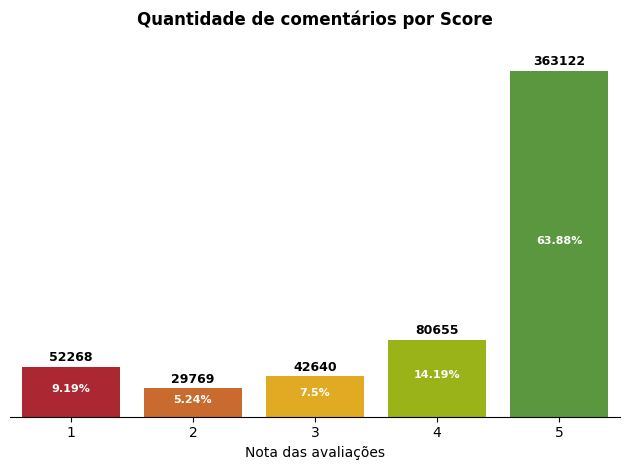

In [9]:
# Gráfico de Barras
ax = sns.barplot(x=score,
           y=contagem,
           palette=cores)

for i in range(len(score)):
    ax.annotate(f"{contagem[i]:.0f}".replace('.', ','),
               (i, contagem[i]),
                ha="center",
                xytext=(0, 4),
                textcoords="offset points",
                fontsize=9,
                fontweight="bold")
    ax.annotate(f"{porcentagens[i]}%",
                (i, contagem[i] / 2),
                ha="center",
                color='white',
                fontsize=8,
                fontweight="bold")

ax.set_title("Quantidade de comentários por Score\n", fontsize=12, fontweight="bold")
ax.set_xlabel("Nota das avaliações")

ax.yaxis.set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

# Plotando o gráfico
plt.tight_layout()
plt.show()

Este gráfico demonstra a distribuição das avaliações de pratos finos comercializados na Amazon, categorizadas por notas de 1 a 5 estrelas e sua respectiva frequência de comentários. A análise revela uma percepção geral positiva por parte dos consumidores em relação a esses produtos, conforme evidenciado pela alta concentração de avaliações positivas.

Especificamente, a maioria expressiva dos usuários (63,88%) atribuiu a nota máxima de 5 estrelas, indicando um alto grau de satisfação. Uma parcela considerável (14,19%) concedeu 4 estrelas, sugerindo uma experiência positiva, embora com algumas áreas para possível aprimoramento. Avaliações neutras (3 estrelas) representam 7,50% do total, enquanto avaliações negativas (2 e 1 estrela) correspondem a 5,24% e 9,19%, respectivamente.

Uma análise mais aprofundada dos comentários associados a cada nota poderia fornecer insights valiosos sobre os atributos específicos que contribuem para a satisfação ou insatisfação dos consumidores, permitindo otimizações estratégicas na oferta e apresentação dos produtos.

<div style="page-break-after: always;"></div>

## 2. Gráfico histograma

In [12]:
# Função para análise de sentimentos
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Aplicando a análise de sentimentos
df['Sentiment'] = df['Text'].apply(get_sentiment)

In [13]:
# Função para remover outliers
def remove_outliers_iqr(df, coluna):
    """Remove outliers usando o método do IQR"""
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limit_inferior = Q1 - 1.5 * IQR
    limit_superior = Q3 + 1.5 * IQR
    df_filtrado = df[(df[coluna] >= limit_inferior) & (df[coluna] <= limit_superior)]
    return df_filtrado

# Aplicando na nova coluna
df_histograma = remove_outliers_iqr(df, "Sentiment")

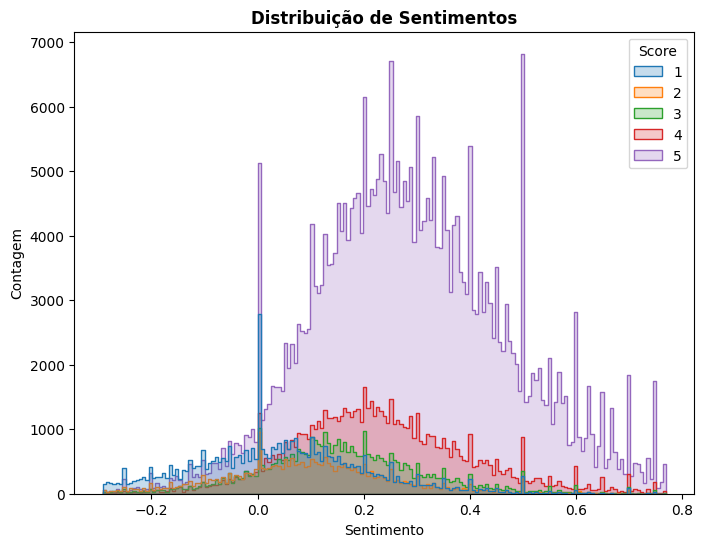

In [14]:
# Gráfico histograma
plt.figure(figsize=(8,6))
ax = sns.histplot(df_histograma, x="Sentiment",
                  palette="tab10",
                  hue="Score",
                  element="step")

ax.set_title("Distribuição de Sentimentos", fontweight='bold')
ax.set_ylabel("Contagem")
ax.set_xlabel("Sentimento")

plt.show()

A análise de sentimentos realizada com a ferramenta TextBlob revelou uma polaridade majoritariamente positiva nos comentários das avaliações, mesmo naqueles associados a notas mais baixas. A polaridade, em sua maioria, se situa na faixa de `0` a `0.4`, indicando um sentimento favorável, embora não de forma intensa.

Essa distribuição sugere que, mesmo em avaliações negativas, os comentários frequentemente contêm elementos positivos e neutros, com uma leve predominância de sentimentos positivos. A presença de polaridade positiva, ainda que moderada, em avaliações de menor pontuação pode indicar que a insatisfação dos clientes está relacionada a aspectos específicos da experiência, e não a uma percepção geral negativa do produto.

## 3. Gráfico de Dispersão

In [17]:
# Contando a quantidade de caracteres e palavras dos comentários
total_chars = df['Text'].str.replace(' ', '').str.len()
total_palavras = df['Text'].str.split().str.len()
print(f"Média de caracteres dos comentários: {total_chars.mean():.0f}")
print(f"Média de palavras dos comentários: {total_palavras.mean():.0f}")

Média de caracteres dos comentários: 355
Média de palavras dos comentários: 80


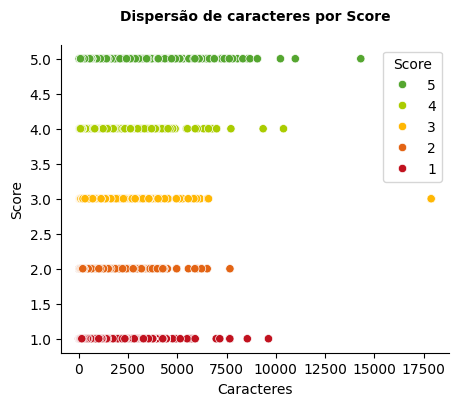

In [18]:
# Gráfico de dispersão
plt.figure(figsize=(5,4))
ax = sns.scatterplot(x=total_chars,
                y=df['Score'],
                hue=df['Score'],
                palette=cores)

ax.set_title("Dispersão de caracteres por Score\n", fontsize=10, fontweight='bold')
ax.set_xlabel("Caracteres")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Organizando a legenda do gráfico
handles, labels = ax.get_legend_handles_labels()
handles = handles[::-1]
labels = labels[::-1]
ax.legend_.remove()

plt.legend(handles, labels, title='Score')
plt.show()

A análise do comprimento dos comentários, medida em caracteres e palavras, revelou uma média de 355 caracteres e 80 palavras por avaliação. Adicionalmente, a visualização da dispersão da quantidade de caracteres por nota (score) indica uma tendência de comentários mais extensos em avaliações positivas (scores mais altos).

Conforme observado no gráfico de dispersão, os comentários associados a avaliações de 4 e 5 estrelas tendem a apresentar um maior número de caracteres em comparação com avaliações negativas (1 e 2 estrelas). Essa correlação sugere que os clientes satisfeitos podem se sentir mais inclinados a detalhar suas experiências positivas, expressando seus pensamentos de forma mais completa e abrangente. Em contrapartida, avaliações negativas tendem a ser mais concisas, possivelmente focando em aspectos específicos de insatisfação sem a elaboração de uma narrativa mais extensa.

<div style="page-break-after: always;"></div>